## NAME: UMESH C
## ROLL NO: 225229144

## Lab5. Text corpus creation and binary classification using DNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense

## 1

In [ ]:
motivational_data = pd.read_csv("motivational.csv")
demotivational_data = pd.read_csv("Unmotivational1.csv")

In [ ]:
motivational_data.head()

,Labels,Quotes,Target
0,1,எப்படி மேலும் அதிகாரமானது அது அதிகாரமானது,1
1,2,நீங்கள் உங்கள் குழுவினை அடைய வேண்டும்,1
2,3,தைரியம் பயத்தை விட ஒரு படி மேலே உள்ளது,1
3,4,சவால்கள் வளர்ச்சிக்கு நேரிட்டு மேம்பாடுகள் ஆகும்,1
4,5,செய்ய முடிந்தவன் சாதிக்கிறான் செய்ய முடியாதவன்...,1


In [ ]:
demotivational_data.head()

,Labels,Quotes,Target
0,1,நீங்கள் ஒருபோதும் ஒன்றாக இல்லாவிட்டால் உங்கள் ...,0
1,2,வாழ்க்கை மட்டும் பிரயாணம்,0
2,3,வெற்றிக்கான பாதை எப்போதும் கட்டமைக்கப்படுகிறது,0
3,4,நல்ல வேலைக்கான வெகுமதி அதிக உழைப்பு,0
4,5,வாழ்க்கை ஏந்தியது பாத்துக்கோங்க,0


In [ ]:
data = pd.concat([motivational_data, demotivational_data], ignore_index=True)

In [ ]:
X = data["Quotes"]
y = data["Target"]

vectorizer = TfidfVectorizer(stop_words=None, max_features=None, analyzer='word')
X_tfidf = vectorizer.fit_transform(X).toarray()

## 3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

## 4

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 523ms/step - loss: 0.7000 - accuracy: 0.4667
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.6963 - accuracy: 0.4667
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6927 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.6890 - accuracy: 0.5333
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.6854 - accuracy: 0.5333
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6817 - accuracy: 0.5333
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.6781 - accuracy: 0.6000
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.6746 - accuracy: 0.6000
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6710 - accuracy: 0.6000
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6675 - accuracy: 0.6667
Epoch 11/100
1/1 [===========

In [ ]:
# Step 7: Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 1.0
Testing Accuracy: 0.6000000238418579


## 5

## A

In [ ]:
import time
import matplotlib.pyplot as plt

In [ ]:
nodes_list = [8, 16, 32, 64, 128, 256, 512, 1028]
training_acc = []
testing_acc = []
running_time = []
num_params = []

In [ ]:
for num_nodes in nodes_list:
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    start_time = time.time()
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    end_time = time.time()

    num_params.append(model.count_params())
    training_acc.append(model.evaluate(X_train, y_train, verbose=0)[1])
    testing_acc.append(model.evaluate(X_test, y_test, verbose=0)[1])
    running_time.append(end_time - start_time)

## parameters learned

Text(0.5, 1.0, 'Number of Parameters vs Number of Nodes')

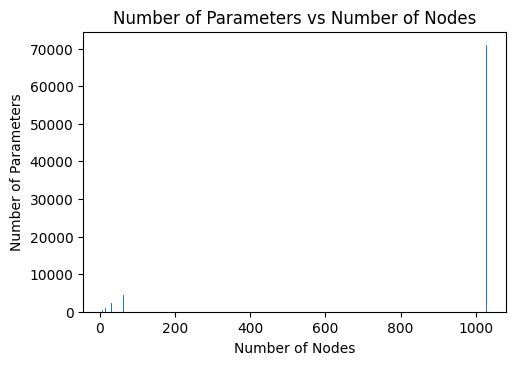

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.bar(nodes_list, num_params)
plt.xlabel("Number of Nodes")
plt.ylabel("Number of Parameters")
plt.title("Number of Parameters vs Number of Nodes")

## training & testing

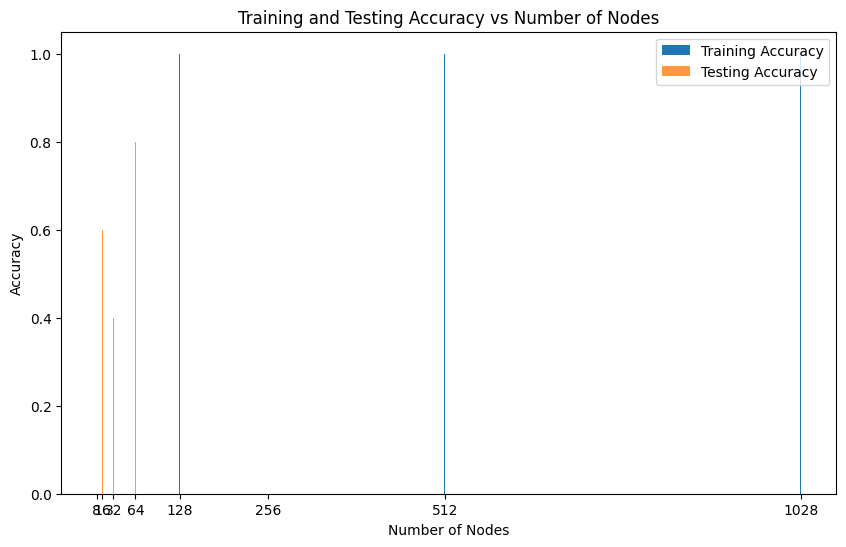

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(nodes_list, training_acc, label="Training Accuracy", width=0.4)
plt.bar(np.array(nodes_list)+0.4, testing_acc, label="Testing Accuracy", alpha=0.8, width=0.4)
plt.xticks(np.array(nodes_list)+0.2, nodes_list)
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy vs Number of Nodes")
plt.legend()

## Running time

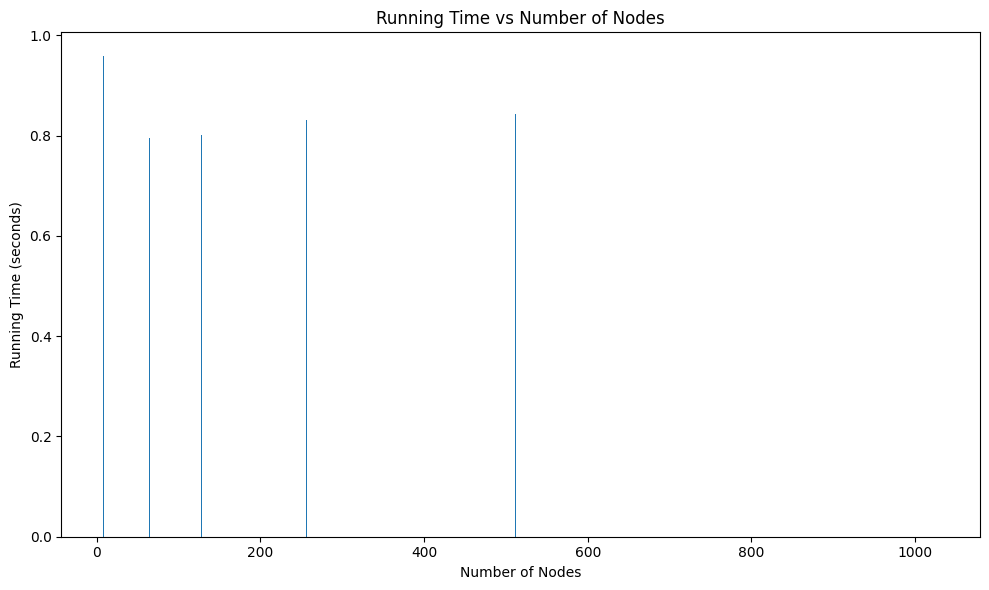

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(nodes_list, running_time)
plt.xlabel("Number of Nodes")
plt.ylabel("Running Time (seconds)")
plt.title("Running Time vs Number of Nodes")

plt.tight_layout()
plt.show()

## B

In [ ]:
num_layers_list = [2, 3, 4, 5]
training_acc_layers = []
testing_acc_layers = []
running_time_layers = []
num_params_layers = []

In [ ]:
for num_layers in num_layers_list:
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    for _ in range(num_layers - 1):
        model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    start_time = time.time()
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    end_time = time.time()

    num_params_layers.append(model.count_params())
    training_acc_layers.append(model.evaluate(X_train, y_train, verbose=0)[1])
    testing_acc_layers.append(model.evaluate(X_test, y_test, verbose=0)[1])
    running_time_layers.append(end_time - start_time)

## Parameters

Text(0.5, 1.0, 'Number of Parameters vs Number of Layers')

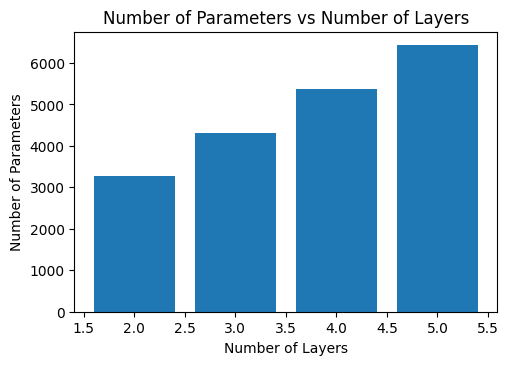

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.bar(num_layers_list, num_params_layers)
plt.xlabel("Number of Layers")
plt.ylabel("Number of Parameters")
plt.title("Number of Parameters vs Number of Layers")

## testing & training

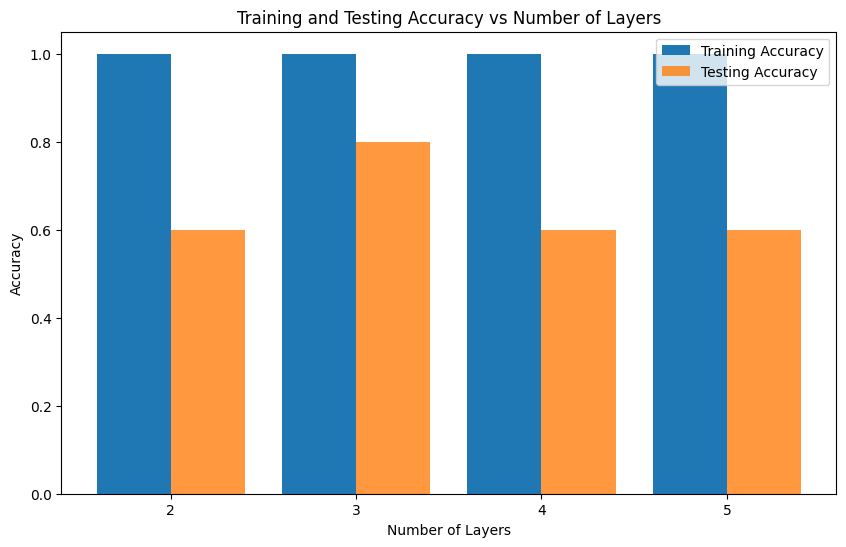

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(num_layers_list, training_acc_layers, label="Training Accuracy", width=0.4)
plt.bar(np.array(num_layers_list)+0.4, testing_acc_layers, label="Testing Accuracy", alpha=0.8, width=0.4)
plt.xticks(np.array(num_layers_list)+0.2, num_layers_list)
plt.xlabel("Number of Layers")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy vs Number of Layers")
plt.legend()

## Running time

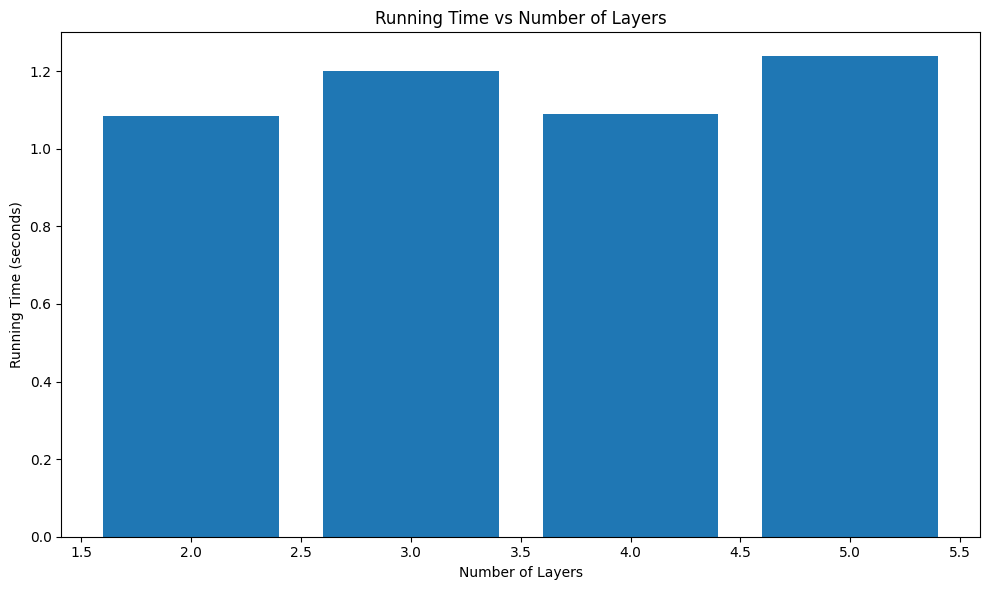

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(num_layers_list, running_time_layers)
plt.xlabel("Number of Layers")
plt.ylabel("Running Time (seconds)")
plt.title("Running Time vs Number of Layers")

plt.tight_layout()
plt.show()

## Table

## Initital

In [ ]:
index_32_nodes = nodes_list.index(32)
print("CONFIGURATION with 32 Nodes:")
print(f"Number of Nodes: {nodes_list[index_32_nodes]}")
print(f"Number of Layers: {num_layers_list[index_32_nodes]}")
print(f"Number of Parameters: {num_params[index_32_nodes]}")
print(f"Training Accuracy: {training_acc[index_32_nodes]:.4f}")
print(f"Testing Accuracy: {testing_acc[index_32_nodes]:.4f}")
print(f"Running Time: {running_time[index_32_nodes]:.4f} seconds")

CONFIGURATION with 32 Nodes:
Number of Nodes: 32
Number of Layers: 4
Number of Parameters: 2209
Training Accuracy: 1.0000
Testing Accuracy: 0.4000
Running Time: 0.8205 seconds


## Model Improvement-I

In [ ]:
# Nodes configurations of interest
nodes_of_interest = [8, 16, 32, 64, 128, 256, 512, 1028]

# Find the indices of the nodes configurations of interest
indices_of_interest = [nodes_list.index(node) for node in nodes_of_interest]

# Print the details for each nodes configuration of interest
print("{:<10} {:<18} {:<18} {:<15} {:<18}".format("Nodes", "Training Accuracy", "Testing Accuracy", "Parameters", "Running Time"))
for i in indices_of_interest:
    nodes = nodes_list[i]
    params = num_params[i]
    train_acc = training_acc[i]
    test_acc = testing_acc[i]
    time_taken = running_time[i]
    print("{:<10} {:<18.4f} {:<18.4f} {:<15} {:<18.4f}".format(nodes, train_acc, test_acc, params, time_taken))

Nodes      Training Accuracy  Testing Accuracy   Parameters      Running Time      
8          0.9333             0.6000             553             0.9580            
16         1.0000             0.6000             1105            0.9418            
32         1.0000             0.4000             2209            0.8205            
64         1.0000             0.8000             4417            0.7944            
128        1.0000             0.8000             8833            0.8005            
256        1.0000             0.6000             17665           0.8304            
512        1.0000             0.8000             35329           0.8421            
1028       1.0000             0.6000             70933           0.8847            


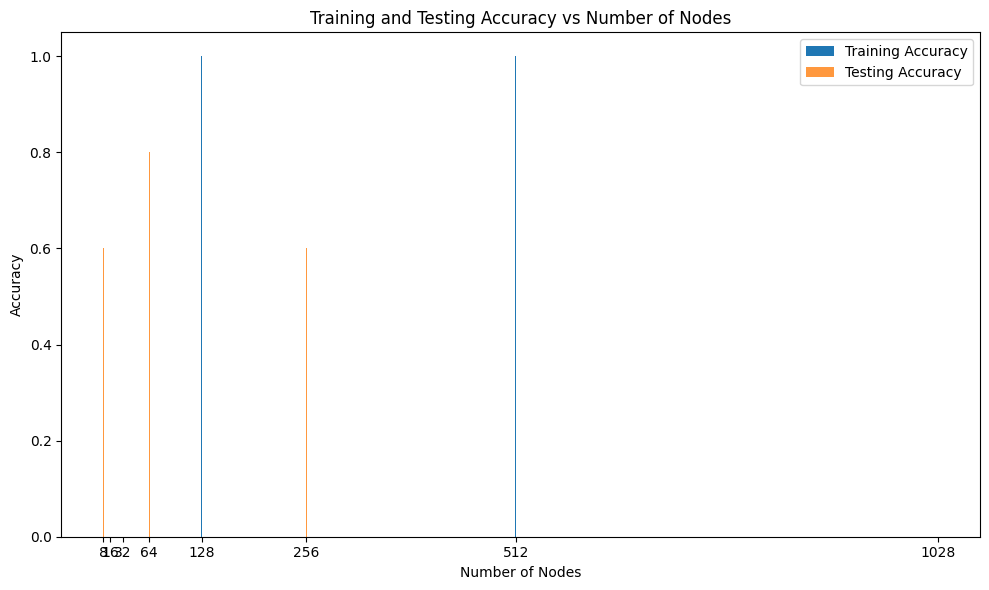

In [ ]:
nodes_of_interest = [8, 16, 32, 64, 128, 256, 512, 1028]
indices_of_interest = [nodes_list.index(node) for node in nodes_of_interest]

plt.figure(figsize=(10, 6))
plt.bar(nodes_list, training_acc, label="Training Accuracy", width=0.4)
plt.bar(np.array(nodes_list)+0.4, testing_acc, label="Testing Accuracy", alpha=0.8, width=0.4)
plt.xticks(np.array(nodes_list)+0.2, nodes_list)
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy vs Number of Nodes")
plt.legend()
plt.tight_layout()
plt.show()

## Model Improvement-II

In [ ]:
layers_of_interest = [2, 3, 4, 5]

indices_of_interest_layers = [num_layers_list.index(layers) for layers in layers_of_interest]

print("{:<10} {:<18} {:<18} {:<15} {:<18}".format("Layers", "Training Accuracy", "Testing Accuracy", "Parameters", "Running Time"))
for i in indices_of_interest_layers:
    layers = num_layers_list[i]
    params = num_params_layers[i]
    train_acc = training_acc_layers[i]
    test_acc = testing_acc_layers[i]
    time_taken = running_time_layers[i]
    print("{:<10} {:<18.4f} {:<18.4f} {:<15} {:<18.4f}".format(layers, train_acc, test_acc, params, time_taken))

Layers     Training Accuracy  Testing Accuracy   Parameters      Running Time      
2          1.0000             0.6000             3265            1.0850            
3          1.0000             0.8000             4321            1.1999            
4          1.0000             0.6000             5377            1.0885            
5          1.0000             0.6000             6433            1.2379            


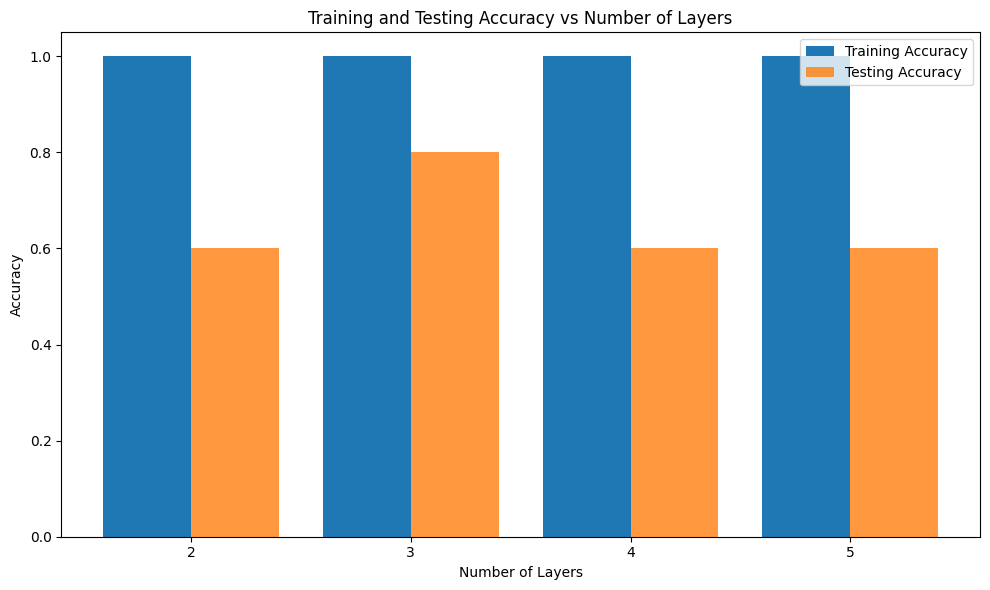

In [ ]:
layers_of_interest = [2, 3, 4, 5]
indices_of_interest_layers = [num_layers_list.index(layers) for layers in layers_of_interest]

plt.figure(figsize=(10, 6))
plt.bar(num_layers_list, training_acc_layers, label="Training Accuracy", width=0.4)
plt.bar(np.array(num_layers_list)+0.4, testing_acc_layers, label="Testing Accuracy", alpha=0.8, width=0.4)
plt.xticks(np.array(num_layers_list)+0.2, num_layers_list)
plt.xlabel("Number of Layers")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy vs Number of Layers")
plt.legend()
plt.tight_layout()
plt.show()

## Best configuration

In [ ]:
if testing_acc and testing_acc_layers and num_layers_list:
    best_index_nodes = np.argmax(testing_acc)
    best_index_layers = np.argmax(testing_acc_layers)

    print("BEST CONFIGURATION for Nodes:")
    print(f"Number of Nodes: {nodes_list[best_index_nodes]}")
    print(f"Number of Parameters: {num_params[best_index_nodes]}")
    print(f"Training Accuracy: {training_acc[best_index_nodes]:.4f}")
    print(f"Testing Accuracy: {testing_acc[best_index_nodes]:.4f}")
    print(f"Running Time: {running_time[best_index_nodes]:.4f} seconds")

    print("\nBEST CONFIGURATION for Layers:")
    print(f"Number of Layers: {num_layers_list[best_index_layers]}")
    print(f"Number of Nodes: {nodes_list[best_index_layers]}")
    print(f"Number of Parameters: {num_params_layers[best_index_layers]}")
    print(f"Training Accuracy: {training_acc_layers[best_index_layers]:.4f}")
    print(f"Testing Accuracy: {testing_acc_layers[best_index_layers]:.4f}")
    print(f"Running Time: {running_time_layers[best_index_layers]:.4f} seconds")
else:
    print("No valid configurations found. Please check your data and code.")

BEST CONFIGURATION for Nodes:
Number of Nodes: 64
Number of Parameters: 4417
Training Accuracy: 1.0000
Testing Accuracy: 0.8000
Running Time: 0.7944 seconds

BEST CONFIGURATION for Layers:
Number of Layers: 3
Number of Nodes: 16
Number of Parameters: 4321
Training Accuracy: 1.0000
Testing Accuracy: 0.8000
Running Time: 1.1999 seconds


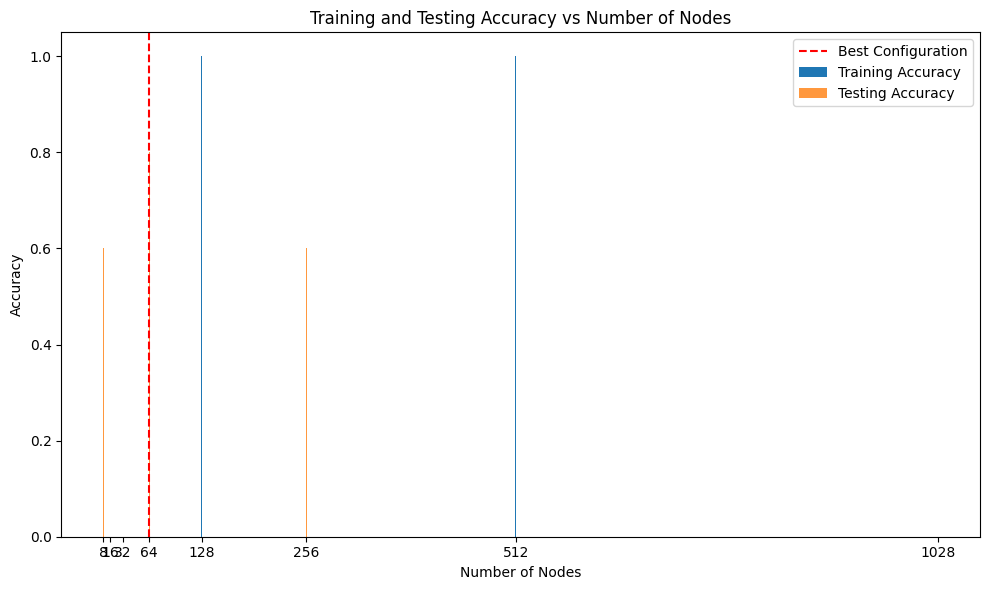

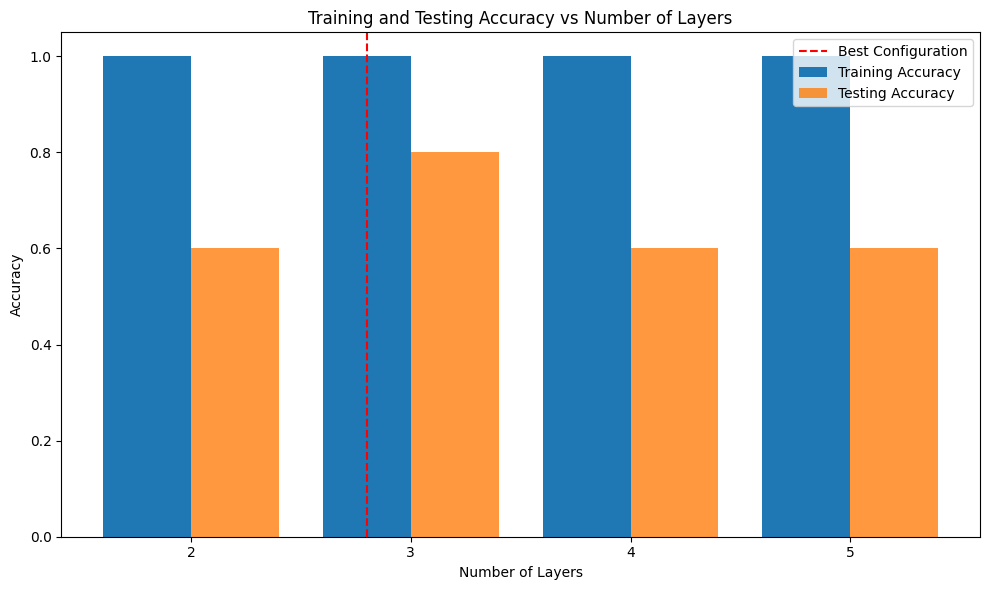

In [ ]:
# Plot training and testing accuracy for different configurations
plt.figure(figsize=(10, 6))
plt.bar(nodes_list, training_acc, label="Training Accuracy", width=0.4)
plt.bar(np.array(nodes_list)+0.4, testing_acc, label="Testing Accuracy", alpha=0.8, width=0.4)
plt.axvline(x=best_config_nodes, color='r', linestyle='--', label='Best Configuration')
plt.xticks(np.array(nodes_list)+0.2, nodes_list)
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy vs Number of Nodes")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(num_layers_list, training_acc_layers, label="Training Accuracy", width=0.4)
plt.bar(np.array(num_layers_list)+0.4, testing_acc_layers, label="Testing Accuracy", alpha=0.8, width=0.4)
plt.axvline(x=best_config_layers, color='r', linestyle='--', label='Best Configuration')
plt.xticks(np.array(num_layers_list)+0.2, num_layers_list)
plt.xlabel("Number of Layers")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy vs Number of Layers")
plt.legend()
plt.tight_layout()
plt.show()